In [119]:
from sklearn import tree
from sklearn import inspection
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import math

In [120]:
## read in data

# cokie laptop
dataPath = "C:\\Users\\cokie\\Workspace\\GithubProjects\\MLPlay\\data\\"

f = open(dataPath + "Polynomial00_X.txt", 'r')
x_data = f.readlines()
x_data = [float(x.strip()) for x in x_data]
f.close()

f = open(dataPath + "Polynomial00_Y.txt", 'r')
y_data = f.readlines()
y_data = [float(y.strip()) for y in y_data]
f.close()

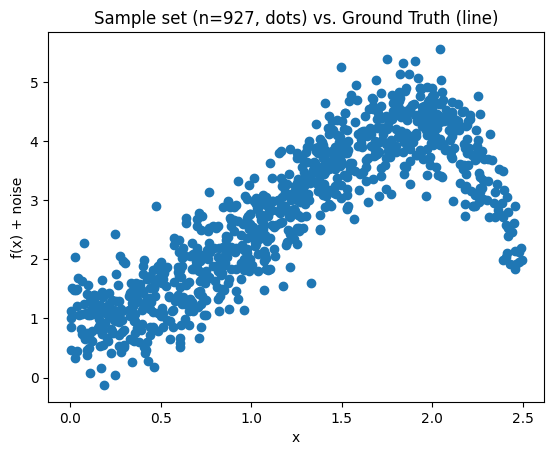

In [121]:
plt.scatter( x_data, y_data )
plt.xlabel("x")
plt.ylabel("f(x) + noise")
plt.title("Sample set (n=" + str(len(x_data)) + ", dots) vs. Ground Truth (line)")

plt.show()

In [122]:
x_train, x_test , y_train , y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

trainSize = len(x_train)
testSize = len(x_test)

(834, 1)
(834, 1)
(93, 1)
(93, 1)


In [123]:
quartic_weights = [-0.5, 1, 0.7, 0.2, 1]
quartic_name = "-0.5x^4 + x^3 + 0.7x^2 + 0.2x + 1"

x = np.linspace(0, 2.5, 100)

def quartic_func(in_val, weights=quartic_weights):
    powers = np.array([4, 3, 2, 1])
    in_vals = np.array([in_val, in_val, in_val, in_val])

    out_val = np.sum( np.power(in_vals, powers) * (weights[:4]) ) + weights[-1]
    
    return out_val

def quartic_func_bulk(in_arr, weights=quartic_weights):
    y = map(quartic_func, in_arr, [weights]*len(in_arr))
    y = np.array(list(y))
    return y

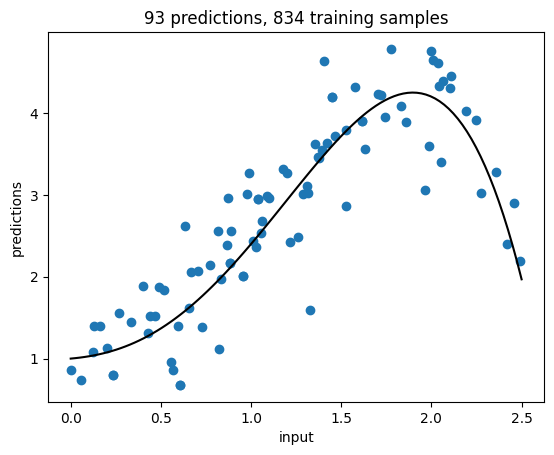

In [124]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

plt.plot( x, quartic_func_bulk(x, quartic_weights), color='black' )
plt.scatter( x_test, predictions )
plt.xlabel("input")
plt.ylabel("predictions")
plt.title(str(testSize) + " predictions, " + str(trainSize) + " training samples")

plt.show()

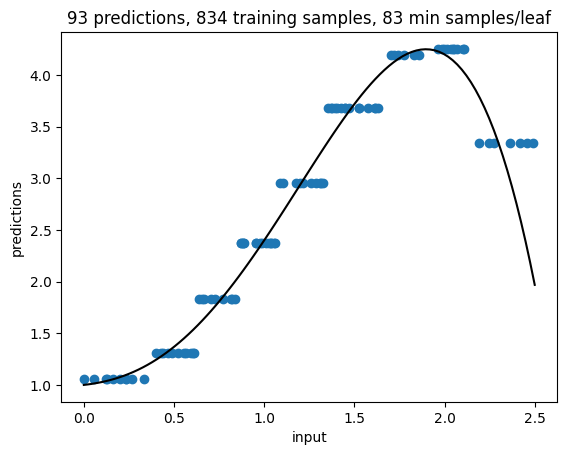

In [125]:
# try again with limits on min_samples_leaf and max_depth
min_samples_leaf = math.floor(0.1*trainSize)

clf = tree.DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
clf = clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

plt.plot( x, quartic_func_bulk(x, quartic_weights), color='black' )
plt.scatter( x_test, predictions )
plt.xlabel("input")
plt.ylabel("predictions")
plt.title(str(testSize) + " predictions, " + str(trainSize) +
          " training samples, " + str(min_samples_leaf) + " min samples/leaf")

plt.show()

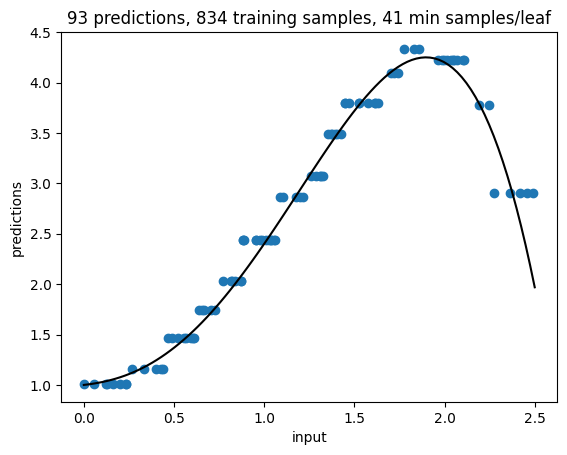

In [126]:
# try again with limits on min_samples_leaf and max_depth
min_samples_leaf = math.floor(0.05*trainSize)

clf = tree.DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
clf = clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

plt.plot( x, quartic_func_bulk(x, quartic_weights), color='black' )
plt.scatter( x_test, predictions )
plt.xlabel("input")
plt.ylabel("predictions")
plt.title(str(testSize) + " predictions, " + str(trainSize) + " training samples, "
          + str(min_samples_leaf) + " min samples/leaf")

plt.show()

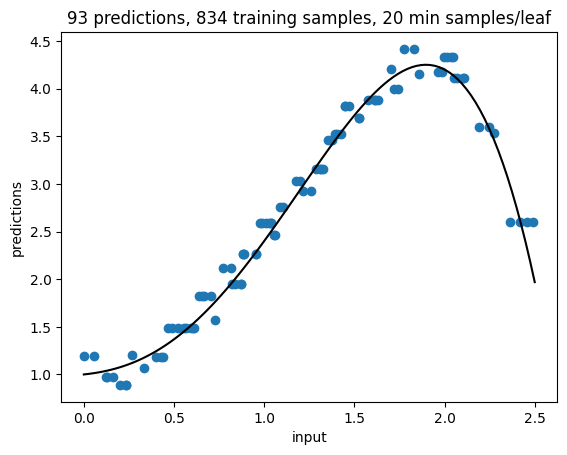

In [127]:
# try again with limits on min_samples_leaf and max_depth
min_samples_leaf = math.floor(0.025*trainSize)

clf = tree.DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
clf = clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

plt.plot( x, quartic_func_bulk(x, quartic_weights), color='black' )
plt.scatter( x_test, predictions )
plt.xlabel("input")
plt.ylabel("predictions")
plt.title(str(testSize) + " predictions, " + str(trainSize) + " training samples, "
          + str(min_samples_leaf) + " min samples/leaf")

plt.show()

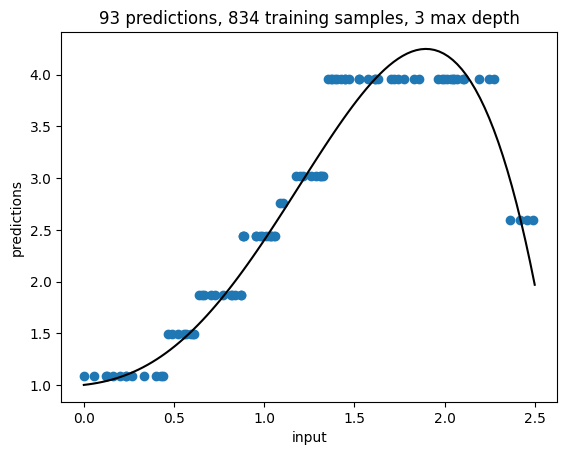

In [128]:
max_depth = 3

clf = tree.DecisionTreeRegressor(max_depth=max_depth)
clf = clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

plt.plot( x, quartic_func_bulk(x, quartic_weights), color='black' )
plt.scatter( x_test, predictions )
plt.xlabel("input")
plt.ylabel("predictions")
plt.title(str(testSize) + " predictions, " + str(trainSize) + " training samples, "
          + str(max_depth) + " max depth")

plt.show()